In [1]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/My Drive/Colab-Notebooks/Analisis-Sentimen-Twitter-Terhadap-Pembatalan-Piala-Dunia-U-20-di-Indonesia-Tahun-2023-main/RawData/nikuba2-noFilter2-Text-Eng.csv")
df

,Unnamed: 0,Text,TextEng
0,0,SAYA SIAP ANGGARKAN RP 40.000 TRILIUN UNTUK NI...,"I AM READY TO BUDGET IDR 40,000 TRILLION FOR N..."
1,1,"tolong pemerintah perhatianya ke nikuba,kayany...","please the government pay attention to Nikuba,..."
2,2,"Kalau nikuba,di pakai di Indonesia, tidak ada ...","If Nikuba is used in Indonesia, there will be ..."
3,3,"Kalau nikuba,di pakai di Indonesia, tidak ada ...","If Nikuba is used in Indonesia, there will be ..."
4,4,"Kalau alat nikuba ini di kembangkan, Pertamina...","If this nikuba tool is developed, Pertamina's ..."
...,...,...,...
549,549,NIKUBA menyelamatkan kendaraan bensin dari ken...,NIKUBA saves petrol vehicles from electric ones
550,550,"15 milyar terlalu kecil, NIKUBA bernilai 1000r...","15 billion is too small, NIKUBA is worth 1000 ..."
551,551,Mengapa pemerintah tidak mau menerima hasil ka...,Why doesn't the government want to accept the ...
552,552,Seharusnya Metro TV tidak hanya nanya ke Aryan...,Metro TV shouldn't just ask Aryanto Misel. Try...


In [5]:
df = df.drop(labels="Unnamed: 0", axis=1)
# df = df.drop(labels="sentiment", axis=1)

In [6]:
df.columns

Index(['Text', 'TextEng'], dtype='object')

In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [8]:
sentiment = SentimentIntensityAnalyzer()
# df["Positive"] = [sentiment.polarity_scores(i)["pos"] for i in df["TextEng"]]
# df["Negative"]= [sentiment.polarity_scores(i)["neg"] for i in df["TextEng"]]
# df["Neutral"] = [sentiment.polarity_scores(i)["neu"] for i in df["TextEng"]]
df["Compound"] = [sentiment.polarity_scores(i)["compound"] for i in df["TextEng"]]
df.head()

,Text,TextEng,Compound
0,SAYA SIAP ANGGARKAN RP 40.000 TRILIUN UNTUK NI...,"I AM READY TO BUDGET IDR 40,000 TRILLION FOR N...",0.4995
1,"tolong pemerintah perhatianya ke nikuba,kayany...","please the government pay attention to Nikuba,...",0.0790
2,"Kalau nikuba,di pakai di Indonesia, tidak ada ...","If Nikuba is used in Indonesia, there will be ...",-0.2960
3,"Kalau nikuba,di pakai di Indonesia, tidak ada ...","If Nikuba is used in Indonesia, there will be ...",-0.2960
4,"Kalau alat nikuba ini di kembangkan, Pertamina...","If this nikuba tool is developed, Pertamina's ...",0.0000


In [9]:
score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05:
        sentiment.append("positif")
    elif i <= -0.05:
        sentiment.append("negatif")
    else:
        sentiment.append("netral")
df["Label"] = sentiment
df.head()

,Text,TextEng,Compound,Label
0,SAYA SIAP ANGGARKAN RP 40.000 TRILIUN UNTUK NI...,"I AM READY TO BUDGET IDR 40,000 TRILLION FOR N...",0.4995,positif
1,"tolong pemerintah perhatianya ke nikuba,kayany...","please the government pay attention to Nikuba,...",0.0790,positif
2,"Kalau nikuba,di pakai di Indonesia, tidak ada ...","If Nikuba is used in Indonesia, there will be ...",-0.2960,negatif
3,"Kalau nikuba,di pakai di Indonesia, tidak ada ...","If Nikuba is used in Indonesia, there will be ...",-0.2960,negatif
4,"Kalau alat nikuba ini di kembangkan, Pertamina...","If this nikuba tool is developed, Pertamina's ...",0.0000,netral


In [10]:
df[['Text','Label']]

,Text,Label
0,SAYA SIAP ANGGARKAN RP 40.000 TRILIUN UNTUK NI...,positif
1,"tolong pemerintah perhatianya ke nikuba,kayany...",positif
2,"Kalau nikuba,di pakai di Indonesia, tidak ada ...",negatif
3,"Kalau nikuba,di pakai di Indonesia, tidak ada ...",negatif
4,"Kalau alat nikuba ini di kembangkan, Pertamina...",netral
...,...,...
549,NIKUBA menyelamatkan kendaraan bensin dari ken...,netral
550,"15 milyar terlalu kecil, NIKUBA bernilai 1000r...",negatif
551,Mengapa pemerintah tidak mau menerima hasil ka...,negatif
552,Seharusnya Metro TV tidak hanya nanya ke Aryan...,positif


In [11]:
pd.value_counts(df['Label'])

positif    277
negatif    181
netral      96
Name: Label, dtype: int64

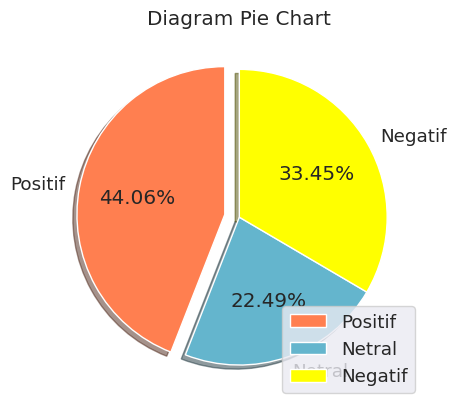

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
#pie chart
labels = ['Positif','Netral','Negatif']
Category2 = [378,193,287]
color = ['coral', 'c','yellow']
plt.pie(Category2, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0, 0))
plt.title('Diagram Pie Chart')
plt.legend()
plt.show()

In [13]:
keep_col = ['Text','Label']
new_df = df[keep_col]
new_df.to_csv("/content/drive/My Drive/Colab-Notebooks/Analisis-Sentimen-Twitter-Terhadap-Pembatalan-Piala-Dunia-U-20-di-Indonesia-Tahun-2023-main/Dataset/nikuba2-label.csv", index=False)